# Importing necessary Libraries :

In [1]:
import math 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt
from collections import defaultdict
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

In [3]:
def score(self, X, y):
    # Get predictions from the model
    predictions = self.predict(X)
    
    # Calculate the mean of the true values
    y_mean = np.mean(y)
    
    # Calculate total sum of squares
    ss_total = np.sum((y - y_mean)**2)
    
    # Calculate residual sum of squares
    ss_res = np.sum((y - predictions)**2)
    
    # Calculate R-squared
    r_squared = 1 - (ss_res / ss_total)
    
    return r_squared


# Reading data :

In [4]:
bc = pd.read_csv("BTC-USD.csv", index_col=0, parse_dates=True)
usd = pd.read_csv("USD.csv", index_col=0, parse_dates=True)

In [5]:
## displaying bitcoin dataframe

bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
print(bc.columns)

Index(['Close', 'Volume'], dtype='object')


In [6]:
## displaying usd dataframe

usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Price
Date,
2020-12-31,89.894
2020-12-30,89.649
2020-12-29,89.918
2020-12-28,90.275
2020-12-24,90.250


In [7]:
## Joining the two dataframes
import warnings
warnings.filterwarnings("ignore")

join = bc
for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2014-09-17,457.334015,21056800,84.486
2014-09-18,424.440002,34483200,84.430
2014-09-19,394.795990,37919700,84.865
2014-09-20,408.903992,36863600,NaN
2014-09-21,398.821014,26580100,NaN


In [8]:
## Properties of new dataframe

join.shape
join.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2301 entries, 2014-09-17 to 2021-01-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2301 non-null   float64
 1   Volume  2301 non-null   int64  
 2   Price   1624 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 136.4 KB


# Sanity check of data :

In [9]:
## finding the number of missing values

join.isnull().sum()


Close       0
Volume      0
Price     677
dtype: int64

In [10]:
## finding the number of duplicate values

join.duplicated().sum()

0

In [11]:
## deleting duplicate values

join.drop_duplicates()

,Close,Volume,Price
Date,,,
2014-09-17,457.334015,21056800,84.486
2014-09-18,424.440002,34483200,84.430
2014-09-19,394.795990,37919700,84.865
2014-09-20,408.903992,36863600,NaN
2014-09-21,398.821014,26580100,NaN
...,...,...,...
2020-12-30,28840.953125,51287442704,89.649
2020-12-31,29001.720703,46754964848,89.894
2021-01-01,29374.152344,40730301359,NaN


# Null value treatment :

In [12]:
 #join = join.dropna()

for i in range(1, join.shape[0]):
    if math.isnan(join['Price'][i]):
        join['Price'][i]=join['Price'][i-1]

In [13]:
## rechecking missing values

join.isnull().sum()

Close     0
Volume    0
Price     0
dtype: int64

In [14]:
## Plotting each parameter wrt date

#join.plot(subplots=True, figsize=(12,8))

# Exploratory data analysis :

In [15]:
## descriptive statistics

join.describe()

,Close,Volume,Price
count,2301.000000,2.301000e+03,2301.000000
mean,4969.315546,9.170531e+09,95.620279
std,4924.241182,1.295208e+10,3.348941
min,178.102997,5.914570e+06,84.430000
25%,445.737000,6.299300e+07,93.775000
50%,3901.131592,3.226250e+09,96.083000
75%,8441.490234,1.562702e+10,97.666000
max,32776.105469,8.233748e+10,103.605000


In [16]:
## Plotting Histograms and other charts

def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

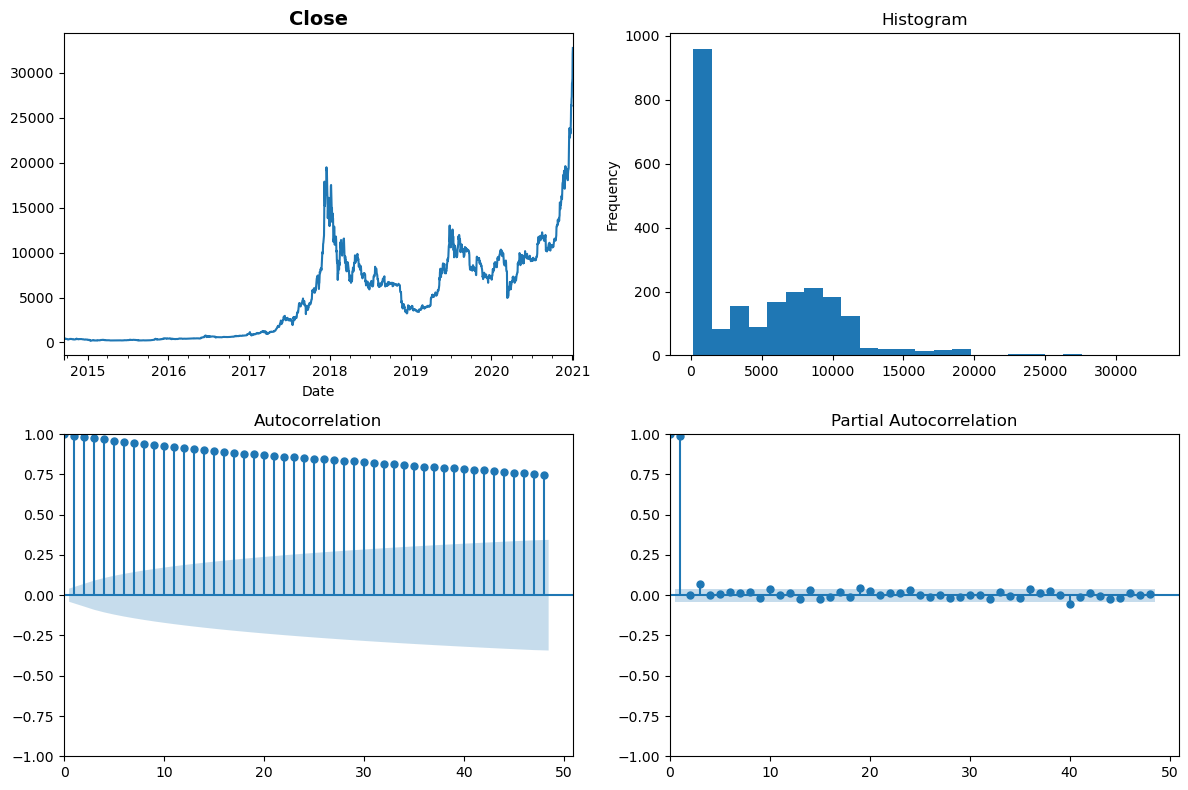

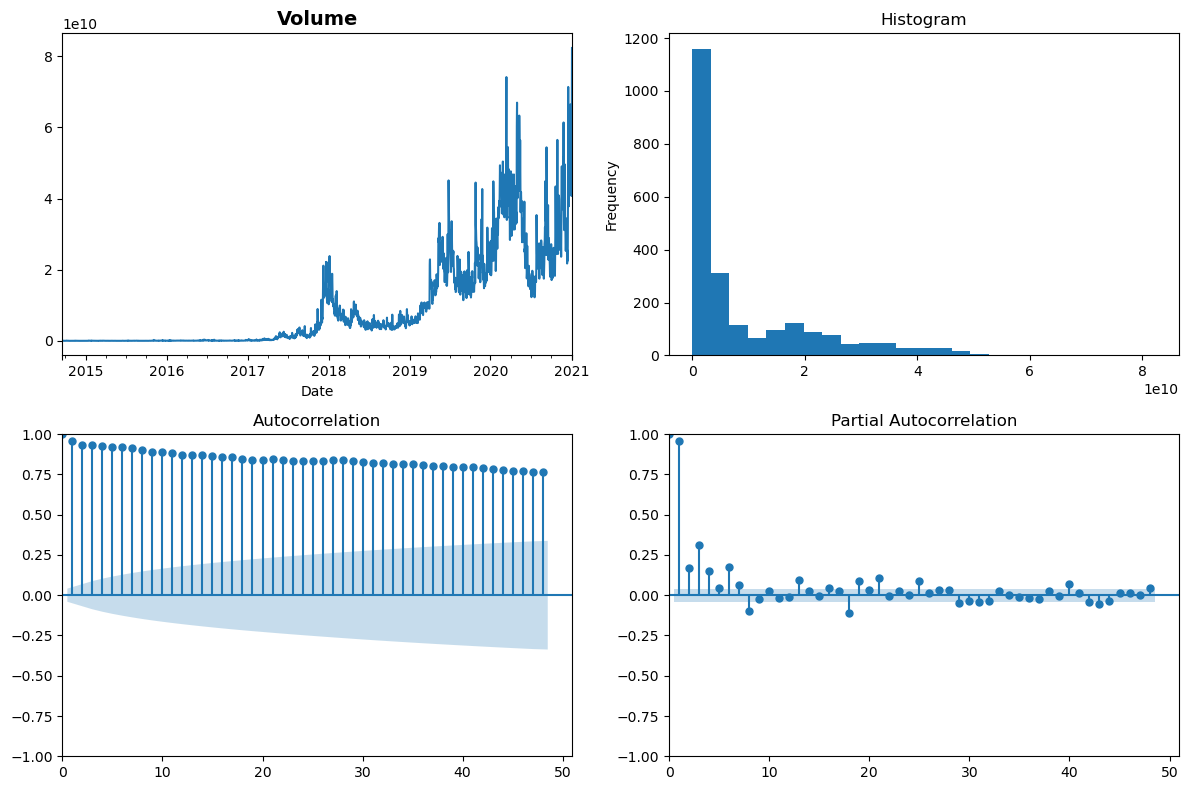

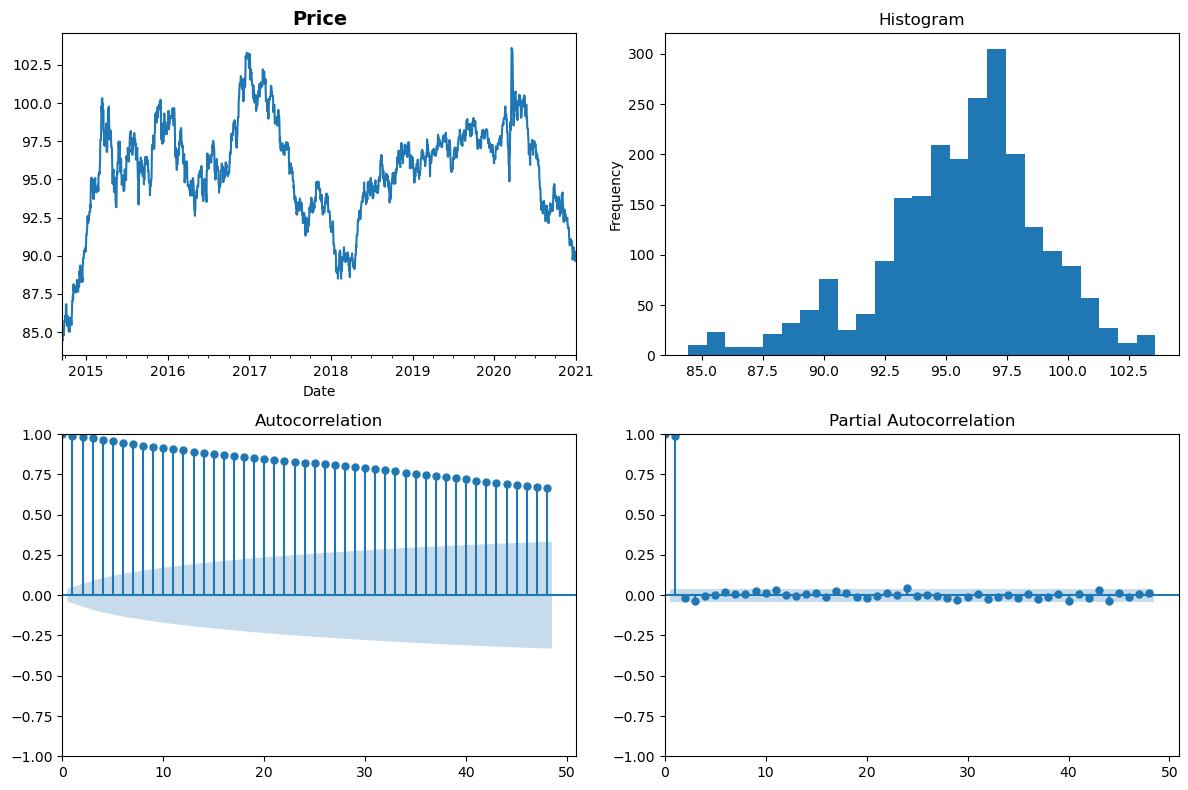

In [17]:
series = join
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)
    
    
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
log_diff = log.diff().dropna()
log_diff=series
#join.plot(subplots=True)

In [18]:
s = join.select_dtypes(include="number").corr()

<Axes: >

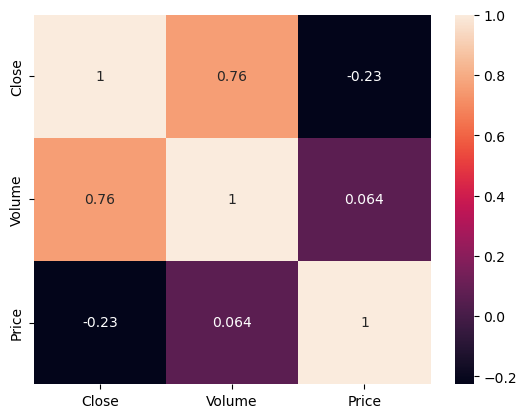

In [19]:
sns.heatmap(s,annot=True)

# Normalization :

In [20]:
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
# join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
log_diff.reset_index()
df=log_diff
df.reset_index()
df

,Close,Volume,Price
Date,,,
2014-09-17,457.334015,21056800,84.486
2014-09-18,424.440002,34483200,84.430
2014-09-19,394.795990,37919700,84.865
2014-09-20,408.903992,36863600,84.865
2014-09-21,398.821014,26580100,84.865
...,...,...,...
2020-12-30,28840.953125,51287442704,89.649
2020-12-31,29001.720703,46754964848,89.894
2021-01-01,29374.152344,40730301359,89.894


In [21]:
# num_var = len(join_norm.iloc[1,:])
# for i in range(0, num_var):
#     plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

In [22]:
df['CloseLag1'] = df['Close'].shift(1)
df['VolLag1'] = df['Volume'].shift(1)
df['VolLag2'] = df['Volume'].shift(2)
df['PriceLag1'] = df['Price'].shift(1)
df=df.dropna()
df

,Close,Volume,Price,CloseLag1,VolLag1,VolLag2,PriceLag1
Date,,,,,,,
2014-09-19,394.795990,37919700,84.865,424.440002,3.448320e+07,2.105680e+07,84.430
2014-09-20,408.903992,36863600,84.865,394.795990,3.791970e+07,3.448320e+07,84.865
2014-09-21,398.821014,26580100,84.865,408.903992,3.686360e+07,3.791970e+07,84.865
2014-09-22,402.152008,24127600,84.863,398.821014,2.658010e+07,3.686360e+07,84.865
2014-09-23,435.790985,45099500,84.779,402.152008,2.412760e+07,2.658010e+07,84.863
...,...,...,...,...,...,...,...
2020-12-30,28840.953125,51287442704,89.649,27362.437500,4.526595e+10,4.905674e+10,89.918
2020-12-31,29001.720703,46754964848,89.894,28840.953125,5.128744e+10,4.526595e+10,89.649
2021-01-01,29374.152344,40730301359,89.894,29001.720703,4.675496e+10,5.128744e+10,89.894


In [23]:
#importing xgboost and train_test_split

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression

#displaying dataset
log_diff=df
log_diff

,Close,Volume,Price,CloseLag1,VolLag1,VolLag2,PriceLag1
Date,,,,,,,
2014-09-19,394.795990,37919700,84.865,424.440002,3.448320e+07,2.105680e+07,84.430
2014-09-20,408.903992,36863600,84.865,394.795990,3.791970e+07,3.448320e+07,84.865
2014-09-21,398.821014,26580100,84.865,408.903992,3.686360e+07,3.791970e+07,84.865
2014-09-22,402.152008,24127600,84.863,398.821014,2.658010e+07,3.686360e+07,84.865
2014-09-23,435.790985,45099500,84.779,402.152008,2.412760e+07,2.658010e+07,84.863
...,...,...,...,...,...,...,...
2020-12-30,28840.953125,51287442704,89.649,27362.437500,4.526595e+10,4.905674e+10,89.918
2020-12-31,29001.720703,46754964848,89.894,28840.953125,5.128744e+10,4.526595e+10,89.649
2021-01-01,29374.152344,40730301359,89.894,29001.720703,4.675496e+10,5.128744e+10,89.894


In [24]:
# Splitting the dataset into training & test subsets

X, y = log_diff.iloc[:,3:], log_diff.iloc[:,-7]
# data_dmatrix = xgb.DMatrix(data=X,label=y)
X=X.reset_index()
y=y.reset_index()
# data_dmatrix = xgb.DMatrix(data=X,label=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# plt.plot(X_test['Date'],X_test['Price'])
# X_test=X_test.index.sort()
X_train =X.loc[X.index < 1900]
y_train =y.loc[y.index < 1900]
X_test =X.loc[X.index >= 1900]
y_test =y.loc[y.index >= 1900]

X_train['Date'] = pd.to_datetime(X_train['Date'])
X_train=X_train.sort_values(by='Date')
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test=X_test.sort_values(by='Date')
y_train['Date'] = pd.to_datetime(y_train['Date'])
y_train=y_train.sort_values(by='Date')
y_test['Date'] = pd.to_datetime(y_test['Date'])
y_test=y_test.sort_values(by='Date')


# X_train
# plt.plot(X_train['Date'],X_train['Price'])

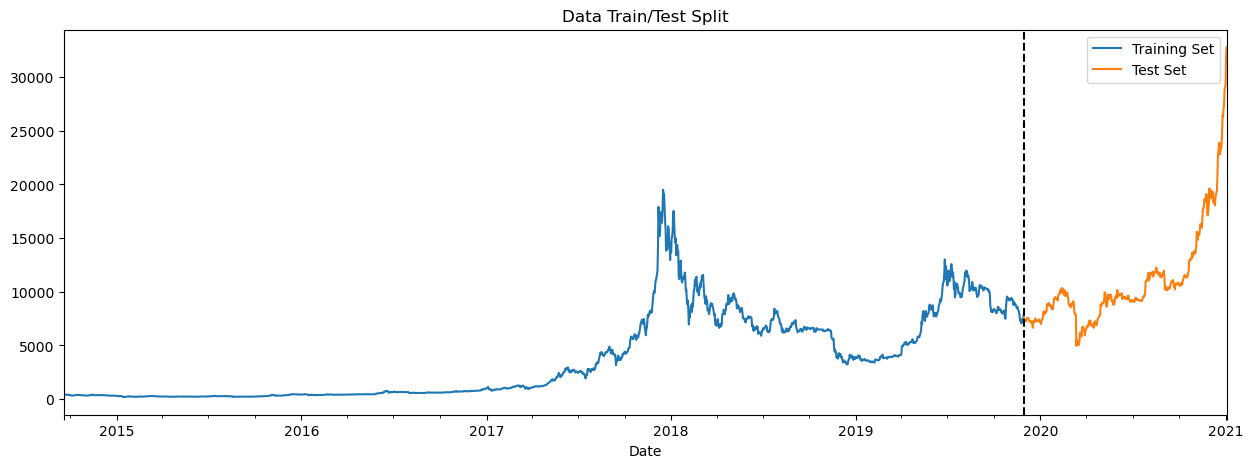

In [25]:
train = log_diff.loc[log_diff.index < '2019-11-30']
test = log_diff.loc[log_diff.index >= '2019-11-30']

fig, ax = plt.subplots(figsize=(15, 5))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='Test Set')
ax.axvline('2019-11-30', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [80]:
import numpy as np

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



# Initialize and fit the model
model = MultipleLinearRegression()
model.fit(X, y)

# Make predictions
new_X = np.array([[10, 11, 12]])
print("Predicted:", model.predict(new_X))


In [27]:
class DecisionTreeRegressor:
    def _init_(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = {}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if depth == self.max_depth or num_samples < self.min_samples_split:
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_y = y[left_indices]
                right_y = y[right_indices]

                mse = np.mean((left_y - np.mean(left_y))*2) + np.mean((right_y - np.mean(right_y))*2)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        return np.array([self._predict_single(sample, self.tree) for sample in X])

    def _predict_single(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_single(sample, tree['left'])
            else:
                return self._predict_single(sample, tree['right'])
        else:
            return tree

In [28]:
class RandomForestClassifier:
    def _init_(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.mean(predictions, axis=1).round().astype(int)

In [29]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''
    
    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)
                
    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y), 
                                     size=math.floor(self.subsample*len(y)), 
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians, 
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose: 
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')
            
    def predict(self, X):
        return (self.base_prediction + self.learning_rate 
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))
    
class TreeBooster():
 
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
        for i in range(self.c): self._find_better_split(i)
        if self.is_leaf: return
        x = self.X.values[self.idxs,self.split_feature_idx]
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
        self.left = TreeBooster(self.X, self.g, self.h, self.params, 
                                self.max_depth - 1, self.idxs[left_idx])
        self.right = TreeBooster(self.X, self.g, self.h, self.params, 
                                 self.max_depth - 1, self.idxs[right_idx])

    @property
    def is_leaf(self): return self.best_score_so_far == 0.
    
    def _find_better_split(self, feature_idx):
        x = self.X.values[self.idxs, feature_idx]
        g, h = self.g[self.idxs], self.h[self.idxs]
        sort_idx = np.argsort(x)
        sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
        sum_g, sum_h = g.sum(), h.sum()
        sum_g_right, sum_h_right = sum_g, sum_h
        sum_g_left, sum_h_left = 0., 0.

        for i in range(0, self.n - 1):
            g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
            sum_g_left += g_i; sum_g_right -= g_i
            sum_h_left += h_i; sum_h_right -= h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:continue
            if sum_h_right < self.min_child_weight: break

            gain = 0.5 * ((sum_g_left**2 / (sum_h_left + self.reg_lambda))
                            + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                            - (sum_g**2 / (sum_h + self.reg_lambda))
                            ) - self.gamma/2 # Eq(7) in the xgboost paper
            if gain > self.best_score_so_far: 
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2
                
    def predict(self, X):
        return np.array([self._predict_row(row) for i, row in X.iterrows()])

    def _predict_row(self, row):
        if self.is_leaf: 
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

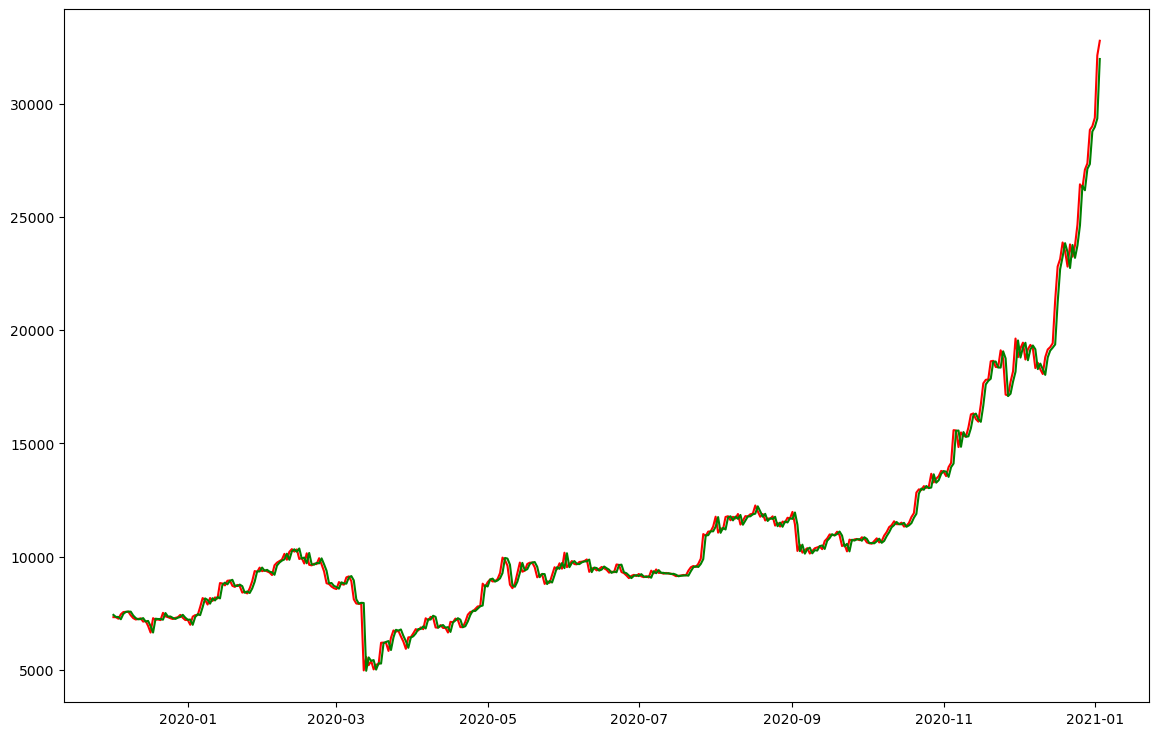

In [81]:
mlr = LinearRegression()
mlr.fit(X_train.iloc[:,1:], y_train.iloc[:,1])
lr_pred = mlr.predict(X_test.iloc[:,1:])


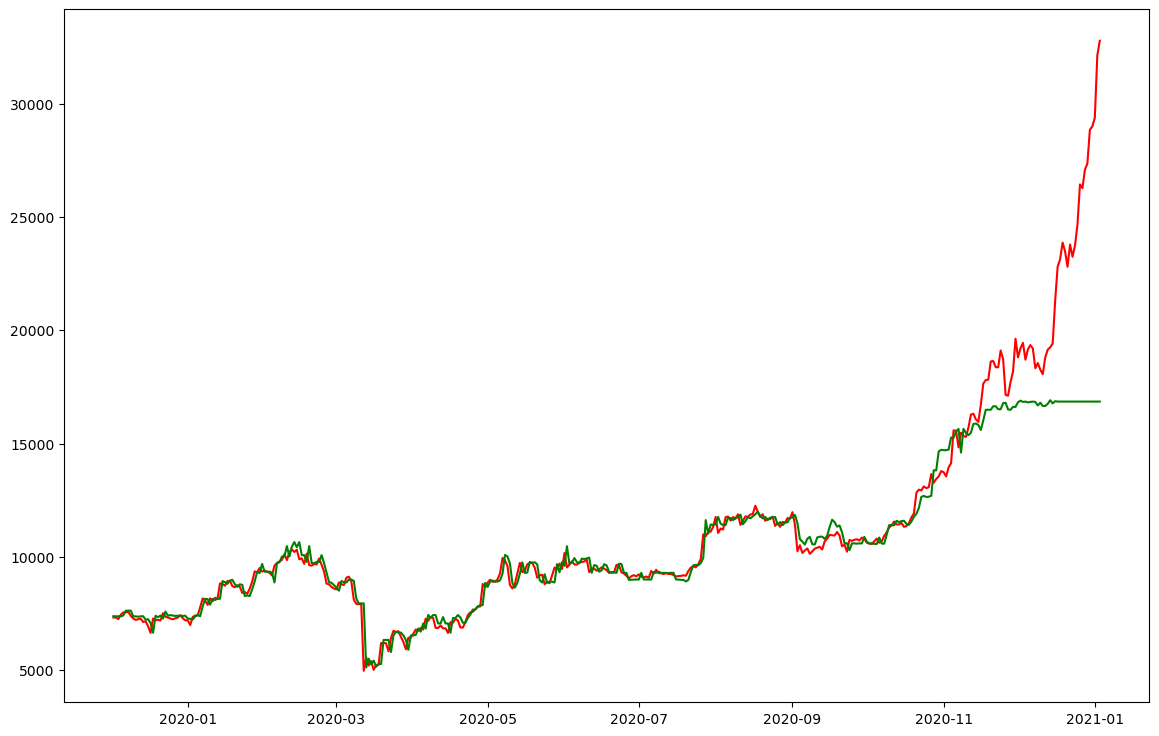

In [77]:
rf_regressor=RandomForestRegressor(n_estimators=150,max_depth=6)
rf_regressor.fit(X_train.iloc[:,1:], y_train.iloc[:,1])
rf_pred=rf_regressor.predict(X_test.iloc[:,1:])


In [32]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.03, max_depth = 4, alpha = 10, n_estimators = 200)

In [59]:
# xg_reg.fit(X_train.iloc[:,1:],y_train.iloc[:,1])
# preds = xg_reg.predict(X_test.iloc[:,1:])

params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 25,
    'base_score': 0.0,
    'tree_method': 'exact',
}
num_boost_round = 50

# train the from-scratch XGBoost model
model_scratch = XGBoostModel(params, random_seed=42)
model_scratch.fit(X_train.iloc[:,1:],y_train.iloc[:,1], SquaredErrorObjective(), num_boost_round)
xgb_pred = model_scratch.predict(X_test.iloc[:,1:])

# Plotting the graph of test output and predicted output with time on the x-axis (daily data)

plt.figure(figsize=(14, 9))

plt.plot(X_test['Date'],y_test['Close'],color='red')
plt.plot(X_test['Date'],xgb_pred,color='green')


In [34]:
# mlr = LinearRegression()
# predictors = ["CloseLag1","VolLag1","VolLag2","PriceLag1"]
# mlr.fit(X_train[predictors],y_train["Close"])
# # mlr_score = mlr.score(X_test.iloc[:,1:2],y_test.iloc[:,1])
# pred_mlr = mlr.predict(X_test[predictors])
# pred_mlr

# expl_mlr = explained_variance_score(pred_mlr,y_test.iloc[:,1])

In [35]:
# rf_regressor = RandomForestRegressor(n_estimators=20,random_state=6)
# rf_regressor.fit(X_train.iloc[:,1:],y_train.iloc[:,1])
# rf_regressor.score(X_train.iloc[:,1:],y_train.iloc[:,1])
# rf_pred =rf_regressor.predict(X_test.iloc[:,1:])
# rf_score=rf_regressor.score(X_test.iloc[:,1:],y_test.iloc[:,1])
# expl_rf = explained_variance_score(rf_pred,y_test.iloc[:,1])

In [37]:
# print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test.iloc[:,1:],y_test.iloc[:,1])*100))
# print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test.iloc[:,1:],y_test.iloc[:,1])*100))
# print("xgboost Model Score is ",round(score(X_test.iloc[:,1:],y_test.iloc[:,1])*100))


In [83]:
# Calculate R-squared score
from sklearn.metrics import r2_score

r_squared_lr = r2_score(y_test['Close'], lr_pred)*100
print("R-squared score of linear regression :", r_squared_lr)

r_squared_rf = r2_score(y_test['Close'], rf_pred)*100
print("R-squared score of random forest :", r_squared_rf)

r_squared_xgb = r2_score(y_test['Close'], xgb_pred)*100
print("R-squared score of xgBoost :", r_squared_xgb)

R-squared score of linear regression : 99.14275056219951
R-squared score of random forest : 77.2877395273476
R-squared score of xgBoost : 68.83219725746767


In [84]:
# y_test
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_test['Close'], lr_pred))
print("RMSE of linear regression : %0.3f" % (rmse_lr) )

rmse_rf = np.sqrt(mean_squared_error(y_test['Close'], rf_pred))
print("RMSE of random forest : %0.3f" % (rmse_rf) )

rmse_xgb = np.sqrt(mean_squared_error(y_test['Close'], xgb_pred))
print("RMSE of xgBoost : %0.3f" % (rmse_xgb) )

RMSE of linear regression : 425.995
RMSE of random forest : 2192.709
RMSE of xgBoost : 2568.644


In [ ]:
# Calculate percentage error for individual predictions

#  from sklearn.metrics import mean_absolute_percentage_error

# percentage_errors1 = np.abs((y_test['Close'] - preds) / y_test['Close']) * 100
# print("Percentage Errors:", percentage_errors)

# percentage_errors2 = np.abs((y_test['Close'] - preds) / y_test['Close']) * 100
# print("Percentage Errors:", percentage_errors)

# percentage_errors3 = np.abs((y_test['Close'] - preds) / y_test['Close']) * 100
# print("Percentage Errors:", percentage_errors)

